# 实验13作业（回归）题目

### 一. 实验1
某水果种植户对某种水果进行网上销售，为了合理定价，现将该水果按事先拟定的价格进行试销，得到如下数据：

单价（元） 7 8 9 10 11 12 13

销量（斤） 120 118 112 110 108 104 102

请利用上述数据集创建并训练了线性回归模型，预测按其他价格销售的预计销量并画出拟合直线。

In [1]:
# （1）导入库
import numpy as np
from sklearn import linear_model  #导入linear_model模块

In [2]:
# 2. 加载训练数据
# 因为训练时特征集需要是二维的，如果生成的是一维数组，需要使用np.newaxis或者reshape(1,1)转化为二维
# X = np.arange(7,14).reshape(-1,1)   #特征集
X = np.arange(7,14)[:,np.newaxis]
y = [120,118,112,110,108,104,102]   #标签集

In [3]:
# 3. 创建线性回归模型对象
clf = linear_model.LinearRegression()   #创建LinearRegression类对象

In [4]:
# 4. 实现使用数据集训练模型
clf.fit(X, y)    #训练回归模型

LinearRegression()

In [5]:
# （4）输出拟合好的函数的系数
print(clf.coef_)  #

[-3.07142857]


In [6]:
# 输出拟合好函数的截距
print(clf.intercept_)  #

141.28571428571428


In [7]:
#设置测试集，假设测试的是6元-14元间的销量
#X_test=np.arange(6,15)[:,np.newaxis]
X_test=np.arange(6,15).reshape(-1,1)
#使用测试集实现预测
y_pred = clf.predict(X_test)  #
print(y_pred)

[122.85714286 119.78571429 116.71428571 113.64285714 110.57142857
 107.5        104.42857143 101.35714286  98.28571429]


In [8]:
#导入matplotlib.pyplot包
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #避免中文出现乱码
plt.rcParams['axes.unicode_minus']=False

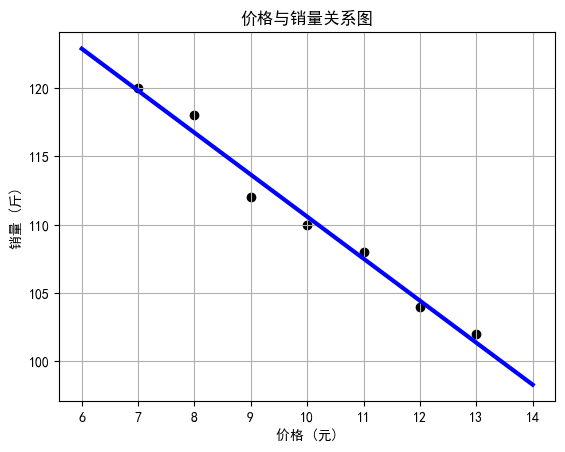

In [9]:
# 9. 绘图输出
plt.title('价格与销量关系图')
plt.xlabel('价格 (元)')
plt.ylabel('销量 (斤)')
plt.grid()#显示网格
#输出价格和销量的散点图
plt.scatter(X, y, color='black')    ###
#输出拟合直线
plt.plot(X_test,y_pred, color='blue', linewidth=3)  #
plt.show()

### 二. 实验2
使用sklearn利用波士顿房价数据集，实现多元线性回归分析。

In [10]:
# （1）导入库
# from sklearn.datasets import load_boston
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split  #导入train_test_split函数
from sklearn.linear_model import LinearRegression  #导入LinearRegression模块

In [11]:
# 2. 加载数据集 
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
# name 不知道怎么收集，打开网址有以下内容，就手打了
'''
 CRIM     per capita crime rate by town
 ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
 INDUS    proportion of non-retail business acres per town
 CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 NOX      nitric oxides concentration (parts per 10 million)
 RM       average number of rooms per dwelling
 AGE      proportion of owner-occupied units built prior to 1940
 DIS      weighted distances to five Boston employment centres
 RAD      index of accessibility to radial highways
 TAX      full-value property-tax rate per $10,000
 PTRATIO  pupil-teacher ratio by town
 B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 LSTAT    % lower status of the population
 MEDV     Median value of owner-occupied homes in $1000's
'''
x = data   #获得特征集
y = target   #获得标签集
names = np.array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT']) #获取特征名称
print(names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [12]:
# 分割数据为训练集和测试集,设置测试集为所有样本数据的10%
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=22)   ##

In [13]:
#导入库
from sklearn.preprocessing import StandardScaler   #导入StandardScaler类
from sklearn import metrics    #导入metrics模块

In [14]:
#标准化处理
#特征集标准化
std_x = StandardScaler()  #生成StandardScaler类对象
x_train = std_x.fit_transform(x_train)  #对训练集（特征集）应用转换规则
x_test = std_x.transform(x_test)   #对测试集（特征集）使用同样的转换规则

In [15]:
# （3）创建线性回归模型对象lr
lr = LinearRegression()

In [16]:
# 使用训练集训练模型
lr.fit(x_train, y_train)    #训练回归模型
# 显示模型
print(lr)
# 显示模型13个系数
print(lr.coef_)   #
# 显示模型截距
print(lr.intercept_)   #

LinearRegression()
[-9.44231976e-01  1.13463671e+00  3.03414097e-03  8.61011938e-01
 -1.93350677e+00  2.72696059e+00 -5.26050294e-03 -3.18908680e+00
  2.78712671e+00 -2.01773347e+00 -1.83323393e+00  9.74657616e-01
 -3.77296858e+00]
22.535604395604405


In [17]:
# （4）对回归模型使用测试集获取预测结果
y_predict=lr.predict(x_test)   #
#输出前5个预测值。
print(y_predict) #

[27.87925408 31.37382373 20.71277013 32.97642595 19.74753418 18.9792736
 20.6929465  19.37899379 19.35857948 32.81867704 20.65572299 27.47510825
 15.1739389  19.47366601 36.90477797 18.25589971  9.24723799 18.18046566
 30.5016638  23.90368362 19.06815846 34.24078056 30.18455767 17.16498856
 34.85033441 26.31648721 34.3591046  27.20782662 18.86212024 14.61507737
 30.96133796 15.8808414  36.94986862  5.60619212 15.97283309 17.16481462
  6.59224482 19.96777491 40.98356572 28.7054902  24.97852496 17.54167592
 39.21885795  6.58382645 21.65166113 25.14677818 20.5289506  20.15338027
 17.49443157 25.80568258  7.94209355]


In [18]:
# （5）模型评估
# 计算并输出决定系数R2
#有两种方法
#方法1
print(lr.score(x_test, y_test))   #
#方法2
print('y_predict R2： %s' % metrics.r2_score(y_test, y_predict))  #

0.7377445682838633
y_predict R2： 0.7377445682838633


In [19]:
# 计算MSE
print("MSE（均方误差）为：%s" % metrics.mean_squared_error(y_test,y_predict))  #

MSE（均方误差）为：23.883843146965955


### 三. 实验3
利用给出的数据集，编程训练一个用于预测儿子身高的回归模型，请基于该模型进行预测，输出平均身高为170厘米的父母，他们的儿子的身高。

x = [173, 155, 160, 165, 170, 175, 180, 170, 190, 180]  #父母的平均身高

y = [170, 162, 164, 169, 175, 178, 185, 172, 180, 175]  #儿子对应的身高 

In [20]:
# 1. 导入库
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression  #导入LinearRegression模块

X = np.array([173, 155, 160, 165, 170, 175, 180, 170, 190, 180]).reshape(-1,1)
y = [170, 162, 164, 169, 175, 178, 185, 172, 180, 175]   #标签集
# 3. 创建线性回归模型对象
clf = linear_model.LinearRegression()   #创建LinearRegression类对象
# 4. 实现使用数据集训练模型
clf.fit(X, y)    #训练回归模型
# 8. 使用测试集实现预测
y_pred = clf.predict(np.array([170]).reshape(-1,1))  #
print(y_pred)

[171.91992434]


### 四.附加题
某运动员的训练次数与运动成绩之间的数据关系如下：

次数 30 33 35 37 39 44 46 50

成绩 30 34 37 39 42 46 48 51

要求：

（1）作出散点图，判断是否可用线性回归模型

（2）如可用，用已有数据训练模型，并计算相关系数、截距

（3）用模型预测该运动员训练47次及55次的成绩（取整数）

（4）利用已给出的次数、成绩及模型的预测成绩画出数据对应的散点图及拟合直线

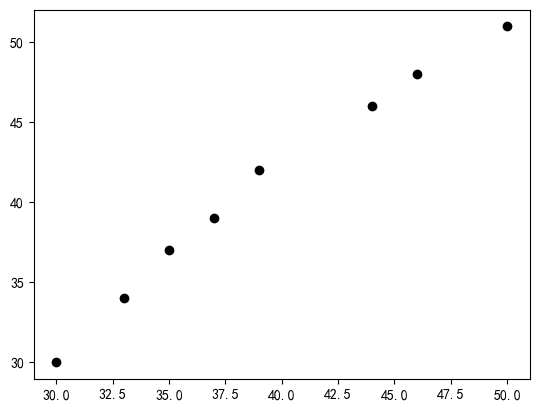

[1.04147813]
-0.0030165912518782534
[49 57]


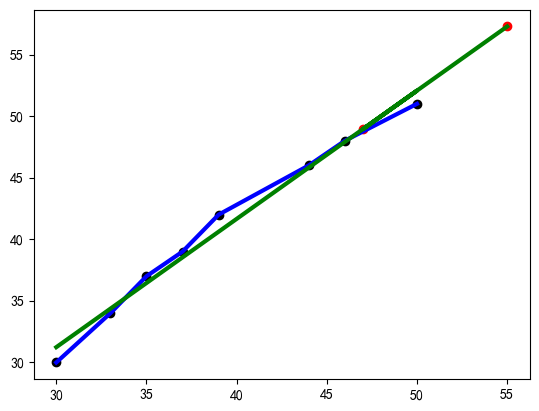

In [21]:
# 1. 导入库
import numpy as np
import pandas as pd
# 导入sklearn相关
from sklearn.model_selection import train_test_split  #导入train_test_split函数
from sklearn.linear_model import LinearRegression  #导入LinearRegression模块
from sklearn import linear_model #导入linear_model模块
#导入matplotlib.pyplot包
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #避免中文出现乱码
plt.rcParams['axes.unicode_minus']=False

# 散点图制作，符合线性回归模型
trytimes = [30,33,35,37,39,44,46,50]
score = [30,34,37,39,42,46,48,51]
plt.scatter(trytimes,score,color='black')
plt.show()
# 2. 加载训练数据
X = np.array(trytimes).reshape(-1,1)
y = score   #标签集
# 3. 创建线性回归模型对象
clf2 = linear_model.LinearRegression()   #创建LinearRegression类对象
# 4. 实现使用数据集训练模型
clf2.fit(X, y)    #训练回归模型
# 5. 输出拟合好的函数的系数
print(clf2.coef_)  #
# 6. 输出拟合好函数的截距
print(clf2.intercept_)  #

# 7. 设置测试集，假设测试的是6元-14元间的销量
# X_test=np.arange(6,15)[:,np.newaxis]
X_test=np.array([47,55]).reshape(-1,1)
# 8. 使用测试集实现预测
y_pred = clf2.predict(X_test)  #
print(y_pred.round(0).astype(int))

# 9. 展示图像
plt.scatter(trytimes,score,color='black')
plt.scatter(X_test,y_pred,color='red')
plt.plot(trytimes, score, color='blue', linewidth=3)
trytimes=[30,33,35,37,39,44,46,50,47,55]
plt.plot(trytimes, clf2.predict(np.array(trytimes).reshape(-1,1)), color='green', linewidth=3)
plt.show()